In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [75]:
# Métricas

def results_regression(y_test_, y_pred_, print_ = False):
    y_pred_ = y_pred_.astype(np.int64)
    cm = confusion_matrix(y_test_, y_pred_)
    report = classification_report(y_test_, y_pred_, zero_division=0.0)
    score = f1_score(y_test_, y_pred_)
    
    if print_:
        print("Matriz de confusão:\n", cm)
        print("Report:\n", report)
        
    return score
    
def compute_classifier(X_, y_, k_, obs_):
    print("++"*30)
    print(obs_)
    print("++"*30)

    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

    classifier = KNeighborsClassifier(n_neighbors=k_, algorithm='auto')
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    return results_regression(y_test, y_pred, True)


In [76]:
data = pd.read_csv('./../../Datasets/heart.csv')

In [77]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
# Uncleaned
def get_data(data_):
    X = data_.drop('target', axis=1)
    y = data_['target']

    return X, y

def get_cleaned_data(data_):
    # Duplicates
    data_.drop_duplicates(keep='first', inplace=True)
    print("Duplicated: ", data_.duplicated().sum())    
    
    print("Missing values: ", data_.isnull().sum().sum())
    
    return get_data(data_)

def get_normalized_data(data_):
    X, y = get_data(data_)
    
    scaler = StandardScaler() 
    X_narmalized = pd.DataFrame.from_records(scaler.fit_transform(X))
    X_narmalized.columns = X.columns

    return X_narmalized, y

X, y = get_normalized_data(data)

In [79]:
k_plot = []
for k in range(3,31,2):
    acc = compute_classifier(X, y, k, f'Classificação, k = {k}')
    k_plot.append({'k': k, 'accuracy': acc})

k_plot

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classificação, k = 3
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Matriz de confusão:
 [[27  2]
 [ 6 26]]
Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.93      0.81      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classificação, k = 5
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Matriz de confusão:
 [[27  2]
 [ 3 29]]
Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg     

[{'k': 3, 'accuracy': 0.8666666666666666},
 {'k': 5, 'accuracy': 0.9206349206349206},
 {'k': 7, 'accuracy': 0.9206349206349206},
 {'k': 9, 'accuracy': 0.8852459016393444},
 {'k': 11, 'accuracy': 0.8888888888888888},
 {'k': 13, 'accuracy': 0.8888888888888888},
 {'k': 15, 'accuracy': 0.90625},
 {'k': 17, 'accuracy': 0.8923076923076922},
 {'k': 19, 'accuracy': 0.8923076923076922},
 {'k': 21, 'accuracy': 0.8923076923076922},
 {'k': 23, 'accuracy': 0.8923076923076922},
 {'k': 25, 'accuracy': 0.8923076923076922},
 {'k': 27, 'accuracy': 0.8923076923076922},
 {'k': 29, 'accuracy': 0.8923076923076922}]

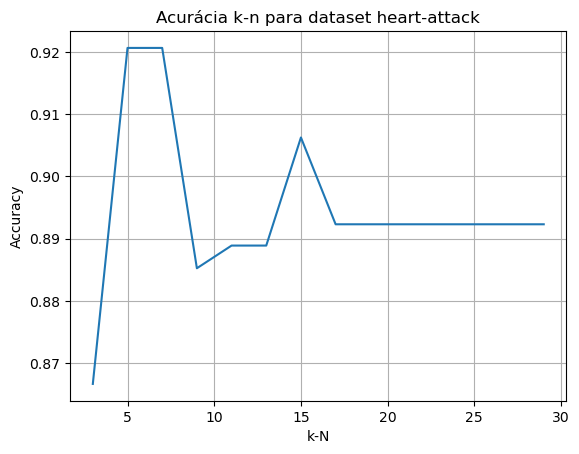

In [80]:
plot_df = pd.DataFrame(k_plot)
plt.plot(plot_df['k'], plot_df['accuracy'])
plt.title("Acurácia k-n para dataset heart-attack")
plt.grid(visible=True)
plt.xlabel('k-N')
plt.ylabel('Accuracy')
plt.show()

In [81]:
plot_df.style.background_gradient(cmap='viridis')

,k,accuracy
0,3,0.866667
1,5,0.920635
2,7,0.920635
3,9,0.885246
4,11,0.888889
5,13,0.888889
6,15,0.906250
7,17,0.892308
8,19,0.892308
9,21,0.892308


In [82]:
k = 5
compute_classifier(X, y, k, f"Computando Classifier com k = {k} (melhor chance)")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Computando Classifier com k = 5 (melhor chance)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Matriz de confusão:
 [[27  2]
 [ 3 29]]
Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



0.9206349206349206